## <span style='color:red'>Clustering </span>
### K-Means Clustering
- Simplestand most commonly used clustering algorithm
- Cluter = Representative of certain regions of the data
- Algorithm alternate between 2 steps (a) assign each data point to the closest centroid (b) determine centroid by taking means of data points

In [280]:
import mglearn1
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

In [281]:
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF

In [282]:
from sklearn.model_selection import train_test_split

In [283]:
import numpy as np

In [284]:
%matplotlib inline

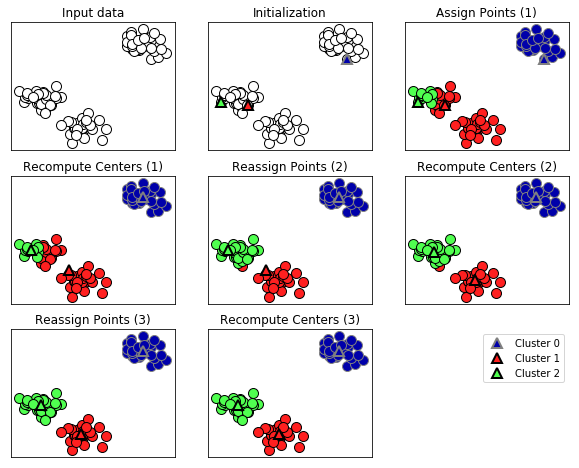

In [285]:
mglearn1.plots.plot_kmeans_algorithm()

### Given new data points, k-means will assign each to the closest cluster center
- Below :- Boundary of clusters learned above

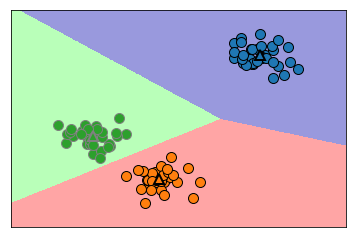

In [286]:
mglearn1.plots.plot_kmeans_boundaries()

## Applying K-MEANS to the synthetic data

In [287]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [288]:
X,y = make_blobs(random_state=42)

In [289]:
kmeans = KMeans(n_clusters=3)

In [290]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [291]:
print('Cluster membership :\n {}'.format(kmeans.labels_))

Cluster membership :
 [1 0 2 0 1 0 2 0 0 2 2 1 1 2 2 1 1 2 1 1 2 1 1 2 2 2 0 1 1 1 1 0 0 1 2 2 2
 2 0 0 1 2 0 2 2 0 1 1 1 0 0 0 2 1 1 1 2 2 0 2 1 0 1 0 1 1 0 1 0 0 0 1 1 2
 0 1 0 1 0 0 2 0 2 1 2 2 2 0 2 0 0 0 2 0 2 2 2 0 1 2]


In [292]:
print(kmeans.predict(X))

[1 0 2 0 1 0 2 0 0 2 2 1 1 2 2 1 1 2 1 1 2 1 1 2 2 2 0 1 1 1 1 0 0 1 2 2 2
 2 0 0 1 2 0 2 2 0 1 1 1 0 0 0 2 1 1 1 2 2 0 2 1 0 1 0 1 1 0 1 0 0 0 1 1 2
 0 1 0 1 0 0 2 0 2 1 2 2 2 0 2 0 0 0 2 0 2 2 2 0 1 2]


In [293]:
plt.scatter(X[:,0],X[:,1],c=y,s=50)

In [294]:
kmeans.cluster_centers_

array([[ 4.49951001,  1.93892013],
       [-6.95170962, -6.67621669],
       [-2.66780392,  8.93576069]])

In [295]:
mglearn1.discrete_scatter(X[:,0],X[:,1],kmeans.labels_,markers='o')
mglearn1.discrete_scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],[0,1,2],markers='^',markeredgewidth=2,s=10)

### Use different cluster values 

In [296]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
for ax,c in zip(axes.ravel(),[2,5]):
    kmeans=KMeans(n_clusters=c)
    kmeans.fit(X)
    assignments=kmeans.labels_
    mglearn1.discrete_scatter(X[:,0],X[:,1],assignments,ax=ax)

## Failure cases of k-Means
- Each cluster is defined solely by its center, which means each cluster is convex, captures only relatively simple cases
- Assumes all cluster has the same diameters ==> Some time leads to SURPRISING result
- ** <span style='color:red'> Below clusters have different densities (diff. sigma) **

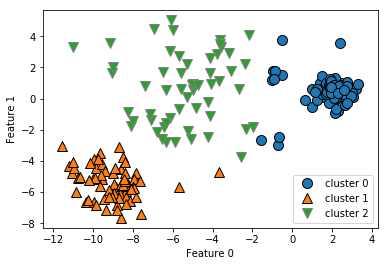

In [297]:
X_varied, y_varied = make_blobs(n_samples=200,cluster_std=[1.0,2.5,0.5],random_state=170)
y_pred = KMeans(n_clusters=3,random_state=0).fit_predict(X_varied)
mglearn1.discrete_scatter(X_varied[:,0],X_varied[:,1],y_pred)
plt.legend(['cluster 0','cluster 1','cluster 2'],loc='best')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

## K Means Can't handle highly non Circular / Shperical data , e.g. diagonal

In [298]:
X,y =make_blobs(random_state=170,n_samples=600)
X[:3,:]

array([[-5.21731084, -0.88251839],
       [-4.03581139, -0.54810115],
       [-9.10044792, -6.98558537]])

In [299]:
rng = np.random.RandomState(74)

In [300]:
np.random.normal(size=(2,2))

array([[ 0.7769049 , -0.59565179],
       [-0.66851692, -0.07670638]])

In [301]:
transformation=rng.normal(size=(2,2))
transformation

array([[ 0.60834549, -0.63667341],
       [-0.40887718,  0.85253229]])

In [302]:
X=np.dot(X,transformation)
X[:3,:]

array([[-2.81308591,  2.56934766],
       [-2.23106162,  2.10221987],
       [-2.67997004, -0.1614239 ]])

In [303]:
kmeans=KMeans(n_clusters=3)

In [304]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [305]:
y_pred=kmeans.predict(X)

In [306]:
kmeans.cluster_centers_.shape

(3, 2)

In [307]:
kmeans.cluster_centers_[:,0]

array([-3.36538693,  1.07294254, -2.59050892])

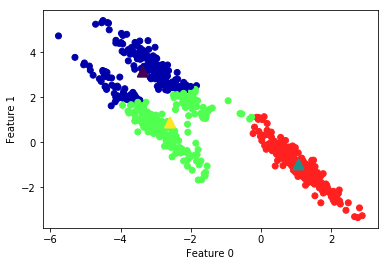

In [308]:
plt.scatter(X[:,0],X[:,1],c=y_pred,cmap=mglearn1.cm3)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='^',
            s=100,linewidths=2,c=[0,1,2])
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

## K-Means in 2 moons data

In [309]:
from sklearn.datasets import make_moons

In [310]:
X,y = make_moons(n_samples=200,noise=0.05,random_state=0)
kmeans=KMeans(n_clusters=2)

In [311]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [312]:
y_pred = kmeans.predict(X)

In [313]:
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,linewidth=2,marker='^',
            c=[mglearn1.cm2(0),mglearn1.cm2(1)])

** <span style='çolor:red'>In the above picture 2 half moon can't possibly be discovered using k-means algorithm </span>**

## <span style='color:red'> PCA , NMF, K-MEANS contrast/comparision/parallel relative to image classification </span>
- ** Decomposition methods **
- PCA => Transform data points to different sub space which has got maximum variation along respective axes
- NMF => Finding out hidden structure = (Extremes or Parts of data) 
- ** Cluster Method **
- K-Means => each data in a cluster has one cluster representative = CLUSTER CENTROID, Each point is called 'Vector Quantization'

** <span style='color:brown'> Compare PCA, NMF, K-MEANS , Extracting components as well as Reconstruction of faces from the test set using 100 components</span> **

In [417]:
people = fetch_lfw_people(min_faces_per_person=20,resize=0.7)

In [418]:
image_shape=people.images[0].shape

In [419]:
image_shape

(87, 65)

In [420]:
people.target.shape

(2936,)

In [421]:
mask = np.zeros(people.target.shape,dtype=np.bool)

In [422]:
## Get people data set having at 
for tgt  in np.unique(people.target):
    mask[np.where(people.target==tgt)[0][:50]]=1
X_people = people.data[mask]
y_people = people.target[mask]
X_people=X_people/255

In [423]:
np.where(people.target==17)[0]

array([   0,    1,   88,  764,  793,  862,  876,  914,  951,  962, 1077,
       1154, 1442, 1465, 1500, 1758, 1807, 1878, 1883, 2099, 2273, 2462,
       2661, 2662, 2687, 2723], dtype=int64)

In [424]:
X_people.shape
#people.data.shape

(1976, 5655)

In [425]:
X_train,X_test,y_train,y_test=train_test_split(X_people,y_people,stratify=y_people,random_state=0)
pca = PCA(n_components=100,random_state=0)
pca.fit(X_train)
nmf = NMF(n_components=100)
nmf.fit(X_train)

NMF(alpha=0.0, beta=1, eta=0.1, init=None, l1_ratio=0.0, max_iter=200,
  n_components=100, nls_max_iter=2000, random_state=None, shuffle=False,
  solver='cd', sparseness=None, tol=0.0001, verbose=0)

In [426]:
kmeans=KMeans(n_clusters=100,random_state=0)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=100, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [440]:
## Now transform test data and reconstruct the image
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_nmf = np.dot(nmf.transform(X_test),nmf.components_)
X_reconstructed_kmeans= kmeans.cluster_centers_[kmeans.predict(X_test)]

In [442]:
nmf.components_.shape

(100, 5655)

In [443]:
nmf.transform(X_test).shape

(494, 100)

In [428]:
print('nmf.components.shape :{}, pca.components.shape :{},kmeans.centers.clusters :{}'.format(nmf.components_.shape
                                                                    ,pca.components_.shape,kmeans.cluster_centers_.shape))

nmf.components.shape :(100, 5655), pca.components.shape :(100, 5655),kmeans.centers.clusters :(100, 5655)


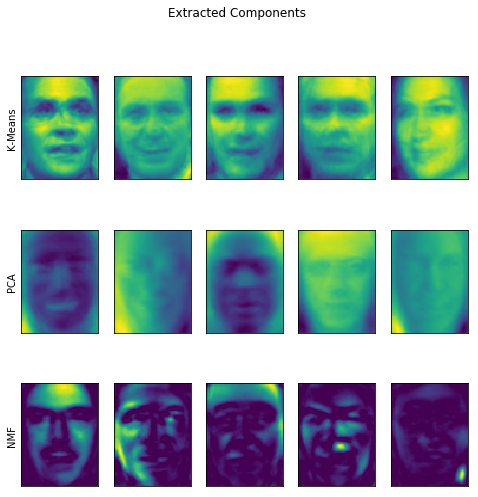

In [429]:
fig,axes = plt.subplots(3,5,figsize=(8,8),subplot_kw={'xticks':(),'yticks':()})
fig.suptitle('Extracted Components')
for ax,comp_kmeans,comp_pca,comp_nmf in zip(axes.T,kmeans.cluster_centers_,pca.components_,nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape))
    ax[2].imshow(comp_nmf.reshape(image_shape))
axes[0,0].set_ylabel('K-Means')
axes[1,0].set_ylabel('PCA')
axes[2,0].set_ylabel('NMF')

In [327]:
X_reconstructed_kmeans.shape
X_reconstructed_nmf.shape
X_reconstructed_pca.shape

(494, 5655)

In [328]:
X_test.shape

(494, 5655)

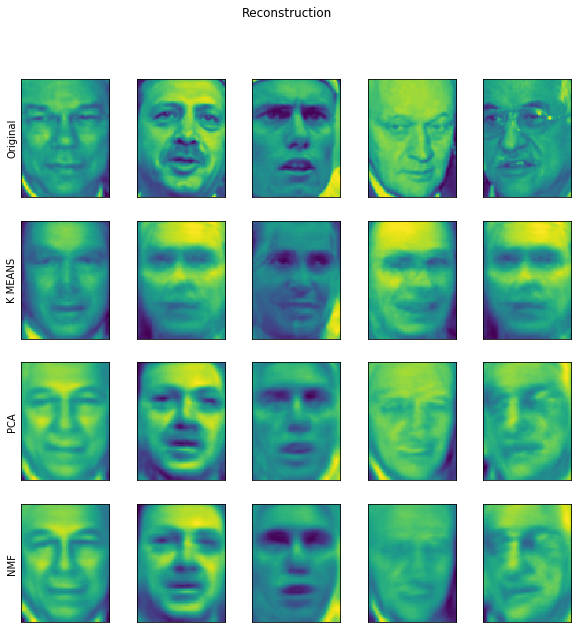

In [329]:
## Display image of the Reconstruction
fig,axes = plt.subplots(4,5,figsize=(10,10),subplot_kw={'xticks':(),'yticks':()})
fig.suptitle('Reconstruction')
for ax,orig,rec_kmeans,rec_pca,rec_nmf in zip(axes.T,X_test,X_reconstructed_kmeans,X_reconstructed_pca,X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0,0].set_ylabel('Original')
axes[1,0].set_ylabel('K MEANS')
axes[2,0].set_ylabel('PCA')
axes[3,0].set_ylabel('NMF')
    

## Using K-Means , we can increase number of clusters , more than the input dimension and get better perspective and encode our data.
## This is not possible using PCA or NMF 
- **<span style = 'color:red'> Example - 2 Moon dataset , and we can use mpre clusters to get separation of two MOONS **

In [330]:
X,y=make_moons(n_samples=200,noise=0.05,random_state=0)

In [331]:
kmeans = KMeans(n_clusters=10,random_state=0)
kmeans.fit(X)
y_pred= kmeans.predict(X)

In [332]:
plt.scatter(X[:,0],X[:,1],c=y_pred,s=60,cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,marker='^',c=range(kmeans.n_clusters),
            linewidths=3)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

## More expressive feature = Build FEATURES as DISTANCE of datapoints from each cluster center
- It will have data points X clusters Center i.e. 200X10 In the previous example of MOON Data set
- ** Use TRANSFORM Methid **

In [333]:
distance_features=kmeans.transform(X)

In [334]:
distance_features.shape

(200, 10)

In [335]:
distance_features[0]

array([ 0.9220768 ,  1.46553151,  1.13956805,  0.45416272,  1.78820579,
        0.82573711,  1.02576102,  1.16559918,  1.03852189,  0.23340263])

<span style='color:green'> 
** Special Notes **
</span>
- K-Means very popular algorithm for CLUSTERING
- Scikit-Learn Includes scalable variant e.g. MiniBatchKMeans (This can hande large data sets)
** Drawbacks **
- K-Means relies on random initialization so model or outcome of algorithm depends on RANDOM SEED
- SCIKIT-LEARN defaults - runs K-MEANS 10 time swith 10 random initialization and returns the best result (With less SUM OF CLUSTER VARIANCES)
- Number of clusters might not be consistent with REAL World Scenario

## <span style='color:blue'>Agglomerative Cluster</span>
- Starts with eaach oint as cluster and subsequently start merging with nearest cluster till there is stopping criteria
- Stopping criteria is usually number of CLUSTER (In SCIKIT-LEARN)
- Following linkage criteria to measure "similar Cluster"
    - Ward - Pick up 2 clusters to merge s.t variance within all clusters increases the LEAST
    - average - Merges 2 clusters those have average distance between all points
    - complete - OR Maximum Linkages -Merges two clsuters that have SMALLEST MAXIMUM distances between points

In [336]:
mglearn1.plots.plot_agglomerative_algorithm()

- ** Agglomerative cluster can't predict for the new test data **
- ** To get the Cluster Number on training set use fit_predict method **

In [337]:
from sklearn.cluster import AgglomerativeClustering

In [338]:
X,y = make_blobs(random_state=1)

In [339]:
agg=AgglomerativeClustering(n_clusters=3)

In [340]:
assignment=agg.fit_predict(X)

## Hierarchical Clustering and Dendograms
- Agglomerative clustering produces HIRARCHICAL clustering..Data points goes through a journey of cluster assignment to final cluster
- Picture below shows all possible clustering 

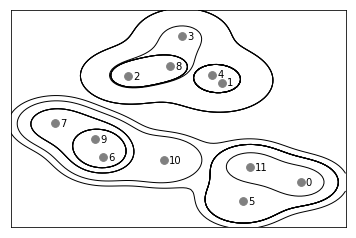

In [341]:
mglearn1.plots.plot_agglomerative()

- ** Can not be used on dataset for more than 2D **
- ** Dendogram can be used to visualize hierarchical clustering in multidimension **
- ** SCIKIT-LEARN doesn't have dendogram functionality **  
** Use SciPy to generate dendogram **

In [342]:
# Import dendrogram function and the WARD clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram,ward

array([[  1.        ,   4.        ,   0.3320945 ,   2.        ],
       [  6.        ,   9.        ,   0.64580193,   2.        ],
       [  2.        ,   8.        ,   0.92683223,   2.        ],
       [  0.        ,  11.        ,   1.1803787 ,   2.        ],
       [  5.        ,  15.        ,   1.30311575,   3.        ],
       [  7.        ,  13.        ,   1.4440339 ,   3.        ],
       [  3.        ,  14.        ,   1.60041812,   3.        ],
       [ 12.        ,  18.        ,   2.07815795,   5.        ],
       [ 10.        ,  17.        ,   2.15981886,   4.        ],
       [ 16.        ,  20.        ,   6.55024854,   7.        ],
       [ 19.        ,  21.        ,   7.92446877,  12.        ]])

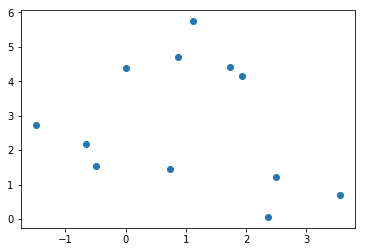

In [343]:
X,y=make_blobs(random_state=0,n_samples=12) 
plt.scatter(X[:,0],X[:,1])
#Apply ward clustering to X
linkage_array= ward(X)
linkage_array

In [344]:
# 1. Linkage_array = ward(X) return linkages array . Each rown contains information related to MERGING CLUSTERs/Point's
#    index/number , LINKAGE DISTANCES, number of data points in the MERGING CLUSTER
# 2. Pass this value as Linkage_array to dendrogram funtion to draw DENDROGRAM
# 3. Mark the cuts in the TREE
dendrogram(linkage_array)
ax=plt.gca()
bounds=ax.get_xbound()
ax.plot(bounds,[7.25,7.25],'--',c='k')
ax.plot(bounds,[4,4],'--',c='k')
ax.text(bounds[1],7.25,'TWO Cluster',va='center',fontdict={'size':15,'color':'r'})
ax.text(bounds[1],4,'THREE Cluster',va='center',fontdict={'size':15,'color':'b'})
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')

## Drawback : Agglomerative cluster fails to separate certain data scenarios of complex shape such as TWO_MOON Data set

## Benefit : Its good model to group / cluster spreaded out data points

## <span style='color:brown'>DBSCAN : Density based spatial clustering of application with Noise</span>
** How does it work **
- Cluster form dense regions of data, separated by regions those are relatively empty
- 2 parameters : min_samples and esp: If there are at least min_samples data points within esp distance to a given data point, that data point is CORE SAMPLE. 
- Core Samples those are closer to each other than the esp are put into the same cluster by DBSCAN
- ALgorithm : Pick up an arbitrary point
- Get all points within the esp radius
- If there are less than min_sample data points that data point is labeled as "NOISE" meaning doesn't belong to any cluster
- If there are more than min_samples then that data point is CORE SAMPLE and assigned a new CLUSTER label.
- Then all neghbouring points ate visited ,
- If they have not been assigned any CLUSTER then assigned the new CLUSTER that was just created.
- If they are CORE SAMPLES, their neighbours are visited in turn and so on.  
- Cluster grows until there are no more CORE SAMPLES within esp of the cluster, and then another point is picked up that hasn't been visited...and procedure is repeated 

** There Points **
- CORE POINTS
- BOUNDARY POINTS 
- NOISE  
- Core Points and Noise are not changed irrespective number of times the algorithm is run against the dataset
- Boundary point change , it may have bordering with few clusters so depened with the starting points but doesn't influence much 

** Advantages **
- No need to set clusters in teh begining, can capture cluster of complex shape  
** Dis advantages **
- slower than agglomerative and K-Means but scale to relatively large dataset


In [345]:
from sklearn.cluster import DBSCAN

In [346]:
X,y =make_blobs(n_samples=12,random_state=0,centers=3)

In [347]:
dbscan= DBSCAN()

In [348]:
clusters =dbscan.fit_predict(X)

In [349]:
clusters

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

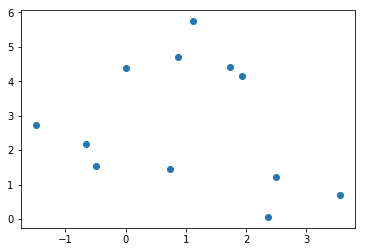

In [350]:
plt.scatter(X[:,0],X[:,1])

### All members stand = -1 , meaning they are NOISE, since min_sample is 5 and esp= 0.5, and all data points don't seem to satify min_sample within esp

### Cluster assignment for different values for min_samples and esp are shown below

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


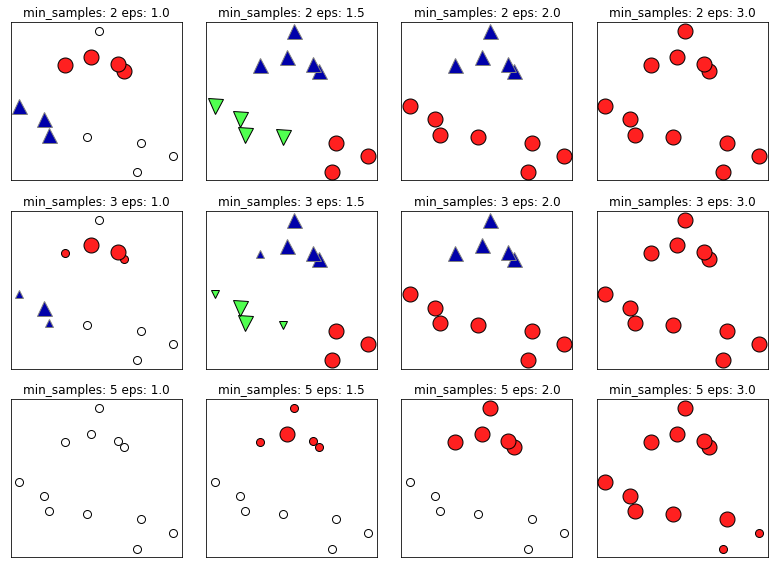

In [351]:
mglearn1.plots.plot_dbscan()

### Run DBSCAN aganist two moon dataset set. 
### Normalize the dataset using StandardScalar function

In [352]:
X,y=make_moons(n_samples=200,noise=0.05,random_state=42)

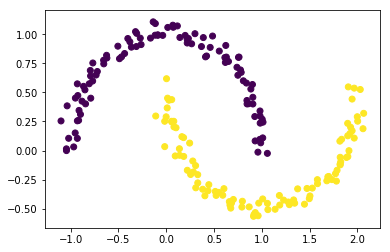

In [353]:
plt.scatter(X[:,0],X[:,1],c=y)

In [354]:
from sklearn.preprocessing import StandardScaler

In [355]:
scaler=StandardScaler()

In [356]:
X_scaled=scaler.fit_transform(X)

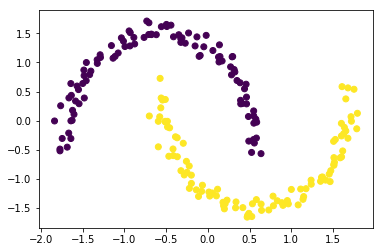

In [357]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=y)

In [358]:
dbscan=DBSCAN(eps=0.5)

In [359]:
clusters=dbscan.fit_predict(X_scaled)

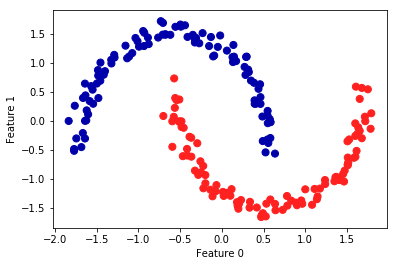

In [360]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,cmap=mglearn1.cm2,s=50)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

** <span style='color:red'>Note: </span> **
- If we vary eps = 0.2, 0.5. , 0.7 then will see cluster numbers changing from many to two to 1 
- We need to be careful while deciding the EPS value , noise is always = -1

## Comparisons between Clustering algorithm: How do we know how well clustering algorithm worked, We don't have labeled or its not supervised learning
### <span style='color:red'> K-Means, Agglomerative, DBSCAN <span>

## Evaluating clustering with ground truth
- Metrics => Measure the outcome of clustering algorithm relative to GROUND TRUTH clustering
- ARI = Adjusted Rand Index, NMI = Normalized Mutual Information (values between 0 and 1)

** Refer Wikipedia and take example from https://davetang.org/muse/2017/09/21/the-rand-index/ **
- ARI = Adjusted Rand Index 
- RI = Rand Index : Is a Measure of Similarity between clusterings  
** We need to understand RI (Rand Index) before ARI **  

** <span style='çolor:red'>RI </span>  **  
S= {a1, a2, a3…an}  have n objects. Lets create two partitions or groups each having sub groups / clusters as below  
- X = {$X_{1},X_{2},X_{3},...X_{r}$} and Y = {$Y_{1},Y_{2},Y_{3},....Y_{s}$}
- a = Number of pairs in the same subsets (CLUSTER) of X and same subsets (CLUSTER) of Y ==> Meaning both partitions agree on the same grouping
- b = Number of pairs not in the same subsets (CLUSTER) of X and also not in the same subsets of Y ==> Meaning both partititions agree to stay on different groupings/Cluster
- c = Number of pairs are in the same subsets of X but different subsets of Y ==> Meaning they DISAGREE
- d = Number of pairs NOT are in the same subsets of X but are in the same subsets of Y ==> DISAGREE  

** R =  $\frac{a+b}{(a+b+c+d)}$  or $\frac{(a+b)}{\binom{n}{2}}$ **
Denominator is all possible combination on n points 

**Intuitively RI is the ratio between AGRREMENT and ALL Possibilities, so teh values fluctuates between 0 and 1 **

** <span style='çolor:green'>ARI </span> **
- Adjusted RAND Index is the corrected for chance version of RAND INDEX. Though RI spans between 0 and 1 but ARI can also have -ve value.
- Build Contingency table . This shows the overlap between between X & Y partitions  
ARI = $\frac{Index - Expected Index}{Max Index - Expected Index}$

** ARI = $\frac{\sum_{ij} \binom{n_{ij}}{2} - \sum_{i} \binom{a_i}{2}\sum_j \binom{b_j}{2}/\binom{n}{2}}{[\sum_i \binom{a_i}{2} + \sum_j\binom{b_j}{2}]/2 - \sum_i\binom{a_i}{2}\sum_j\binom{b_j}{2}/\binom{n}{2}}$ **




In [361]:
from sklearn.metrics.cluster import adjusted_rand_score

In [362]:
X,y=make_moons(n_samples=200,noise=0.05,random_state=0)

In [363]:
scaler=StandardScaler()

In [364]:
X_scaled=scaler.fit_transform(X)

In [365]:
random_state=np.random.RandomState(seed=0)
random_clusters = random_state.randint(0,2,len(X))
adjusted_rand_score(y,random_clusters)

0.0030909075298446473

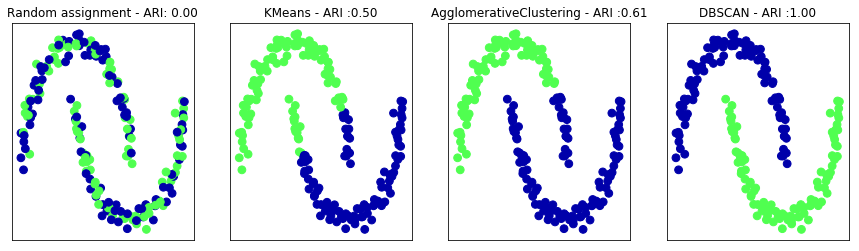

In [366]:
algorithms =[KMeans(n_clusters=2),AgglomerativeClustering(n_clusters=2),DBSCAN()]

fig,axes=plt.subplots(1,4,figsize=(15,4),subplot_kw={'xticks':(),'yticks':()})
axes[0].scatter(X_scaled[:,0],X_scaled[:,1],c=random_clusters,cmap=mglearn1.cm3,s=60)
axes[0].set_title('Random assignment - ARI: {:.2f}'.format(adjusted_rand_score(y,random_clusters)))

for ax,algorithm in zip(axes[1:],algorithms):
    clusters=algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters, s=60,cmap=mglearn1.cm3)
    ax.set_title('{} - ARI :{:.2f}'.format(algorithm.__class__.__name__,adjusted_rand_score(y,clusters)))


In [367]:
algorithm.__class__.__name__

'DBSCAN'

In [368]:
## There is difference between ACCURACY SCORE and ARI measures. ARI is 100% so long as data points are in the same 
## cluster irrespective of the ordering
from sklearn.metrics import accuracy_score
clusters1=[0,0,1,1,0,1,1]
clusters2=[1,1,0,0,1,0,0]
adjusted_rand_score(clusters1,clusters2), accuracy_score(clusters1,clusters2)


(1.0, 0.0)

## <span style='color:red'> SILHOUETTE Score:</span>
- This score reflects upon the degree of similarity of an object to its own cluser. This coefficient score computes the compactness of a CLUSTER.
- Value ranges from -1 to +1 . +1 means object is well matched to its own cluster and poorly with other
- The downside is , though COMPACT CLUSTERS are good, compactness doesn't allow for complex shapes.
- ** <span style='color:green'> Example: Comparing the outcome of K-Means, Agglomerative clustering and DBSCAN on TWO-MOON data set using SILHOUETTE SCORE **
- ** Interpretation ** = If many points have high value then CLUSTERING Configuration is appropriate (Meaning # of clustering and assignments of objects to the cluster seems to be appropriate, Whereas if many objects have -ve or low scoring then it means CLUSTERING are very few or are many
- Mathematical Representation :-
- $a(i)$ = Average distance of data point (i) to its own cluster's all data points. Smaller the value better the assignment
- $b(i)$ = LOWEST Average distance of data point (i) to any cluster's all data points of which i is not the member. This lowest amongst all clusters becomes $i^{th}$ neighbouring cluster  
$s(i) = \frac{a(i) - b(i)}{max(a(i),b(i))}$, whether a(i) >=< b(i) , -1<=s(i)<=+1
- Average s(i) over all data points is a measure of how tighthly data points are grouped to its clusters. Its a measure of how datapoints are well grouped in the dataset.
- Lets say k-means cluster is used and has wrongly picked up clusters, then some clusters may get narrowly defined SILHOUTTE than teh rest.
- so too few or too many clusters will get some of the clusters narrowly defined SILHOUTTE
- SILHOUTTE measure can be imporved by having correct number of clusters by RESCALING data using FEATURE WEIGHTs those are cluster specific

In [369]:
from sklearn.metrics.cluster import silhouette_score

In [370]:
X,y=make_moons(n_samples=200,noise=0.05,random_state=0)
scaler =StandardScaler()

In [371]:
X_scaled=scaler.fit_transform(X)

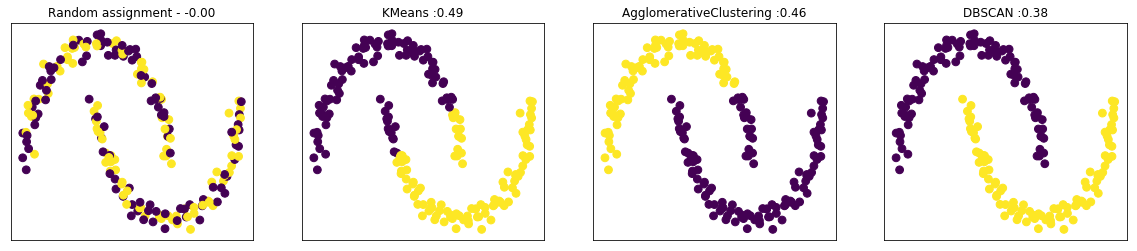

In [372]:
fig,axes=plt.subplots(1,4,figsize=(20,4),subplot_kw={'xticks':(),'yticks':()})
algorithms =[KMeans(n_clusters=2),AgglomerativeClustering(n_clusters=2),DBSCAN()]
random_state=np.random.RandomState(seed=0)
random_clusters=random_state.randint(0,2,size=len(X))
axes[0].scatter(X_scaled[:,0],X_scaled[:,1],c=random_clusters,s=60)
axes[0].set_title('Random assignment - {:.2f}'.format(silhouette_score(X_scaled,random_clusters)))

for ax, algorithm in zip(axes[1:],algorithms):
    cluster=algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0],X_scaled[:,1],c=cluster,s=60)
    ax.set_title('{} :{:.2f}'.format(algorithm.__class__.__name__,silhouette_score(X_scaled,cluster)))
    

## <span style='color:brown'>Comparing algorithm on face dataset</span>
- Lets use K-Means, Agglomerative , DBSCAN clustering algorithm to the labeled faces in the Wild dataset to find any interesting structure
- We will use the EIGNFACE representation of the data , as produced by PCA with 100 components
- PCA produces components yielding more SEMANTIC representation of face images than the raw pixels

In [373]:
pca=PCA(n_components=100,whiten=True,random_state=0)

In [374]:
pca.fit_transform(X_people)
X_pca=pca.transform(X_people)

In [375]:
X_pca.shape

(1976, 100)

** <span style='color:red'>Analyze face dataset with DBSCAN clustering technique and contrast between PCA Transformed datapoints and original Datapoints </span>**

In [376]:
dbscan=DBSCAN()

In [377]:
labels= dbscan.fit_predict(X_pca)

In [378]:
print('Unique labels: {}'.format(np.unique(labels)))

Unique labels: [-1]


In [379]:
# Above parameters of DBSCAN treats all datapoints as NOISE, so lets increase 'eps' and/or decrease 'min_sample'
dbscan=DBSCAN(min_samples=3)

In [380]:
np.unique(dbscan.fit_predict(X_pca))

array([-1], dtype=int64)

In [381]:
# Didn't change NOISE perception, so lets improvise parameters more
dbscan=DBSCAN(min_samples=3,eps=15)

In [382]:
labels= dbscan.fit_predict(X_pca)
np.unique(labels)

array([-1,  0], dtype=int64)

In [383]:
# Now lets us look at number of points in each cluster
print('Number of datapoints in each cluster: {}'.format(np.bincount(labels+1)))

Number of datapoints in each cluster: [  32 1944]


In [384]:
# Now lets run the same clustering technique with PCA Transformation
X_people.shape

(1976, 5655)

In [385]:
dbscan=DBSCAN()

In [386]:
labels_original_data=dbscan.fit_predict(X_people)
print('Clusters {}'.format(np.unique(labels_original_data)))

Clusters [-1]


In [387]:
dbscan=DBSCAN(min_samples=3)

In [388]:
labels_original_data=dbscan.fit_predict(X_people)
print('Clusters with improvised Min Sample {}'.format(np.unique(labels_original_data)))

Clusters with improvised Min Sample [-1]


In [389]:
dbscan=DBSCAN(min_samples=3,eps=15)

In [390]:
## I am testing while scaling image dataset 
## scaler=StandardScaler()

In [391]:
## X_people_temp=scaler.fit_transform(X_people)

In [392]:
labels_original_data=dbscan.fit_predict(X_people)
print('Clusters with improvised Min Sample {}'.format(np.unique(labels_original_data)))

Clusters with improvised Min Sample [-1  0]


In [393]:
# Now lets us look at number of points in each cluster
print('Number of datapoints in each cluster: {}'.format(np.bincount(labels_original_data +1)))

Number of datapoints in each cluster: [  12 1964]


## Conclusion : Number of OUTLIERS or NOISE is less in X_People data set which is not PCA Transformed as compared to PCA Transformed. What does this mean ??

## <span style='color:green'> Analyze noise while getting those picture</span>

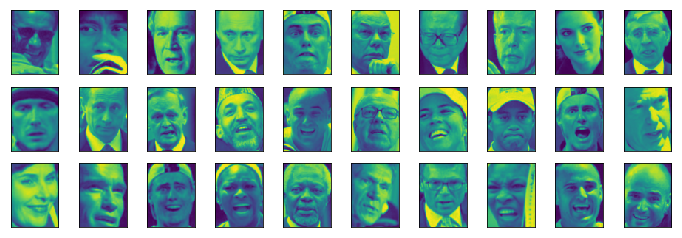

In [394]:
# We take noise data points from the PCA Transformed space and analyze those images falling into those NOISE segment
noise=X_people[labels==-1]
fig,axes=plt.subplots(3,10,subplot_kw={'xticks':(),'yticks':()},figsize=(12,4))
for image,ax in zip(noise,axes.ravel()):
    ax.imshow(image.reshape(image_shape),vmin=0,vmax=1)


## <span style='color:red'> _Analysis/Conclusion:_ If we look up the images categorized as -1 or NOISE set, each one of the figure has got some peculiarity as compared to the normal images..e.g. 1st row and 2nd column - Tiger has put his fingure onto his face, similarly others face look bit tited or turned </span>
- This kind of analysis is carried out to find ODD-ONE out is called OUTLIER or not falling the NORMAL crowd
- The whole idea is to find some structure from the data , It may not neccessarily tell things those could be relevant in the reality or practical application


** <span style='color:blue'>Derive more Clusters:</span> **
- Set EPS smaller (meaning distance of theneighbouring data points to be less - CRITICAL Data points)

In [395]:
eps_range = [1,3,5,7,9,11,13]
for eps in eps_range:
    dbscan=DBSCAN(min_samples=3,eps=eps)
    labels=dbscan.fit_predict(X_pca)
    print('\n---------------------------------------')
    print('eps = {}'.format(eps))
    print('Clusters ={}'.format(np.unique(labels)))
    print('Data points in Cluster :{}'.format(np.bincount(labels+1)))


---------------------------------------
eps = 1
Clusters =[-1]
Data points in Cluster :[1976]

---------------------------------------
eps = 3
Clusters =[-1]
Data points in Cluster :[1976]

---------------------------------------
eps = 5
Clusters =[-1]
Data points in Cluster :[1976]

---------------------------------------
eps = 7
Clusters =[-1  0  1  2  3  4  5  6  7]
Data points in Cluster :[1920   19   14    3    3    3    7    3    4]

---------------------------------------
eps = 9
Clusters =[-1  0  1  2  3]
Data points in Cluster :[1213  754    3    3    3]

---------------------------------------
eps = 11
Clusters =[-1  0]
Data points in Cluster :[ 393 1583]

---------------------------------------
eps = 13
Clusters =[-1  0]
Data points in Cluster :[ 118 1858]


** <span style='color:blue'>Note: </span>**  
<span style='color:red'>We get varying clusters while we change EPS . If we zoom into eps =7 , gives many small clusters. So lets dig deep into this, analyze data points more for this level of EPS. </span>

In [396]:
dbscan=DBSCAN(min_samples=3,eps=7)

In [397]:
labels=dbscan.fit_predict(X_pca)

In [398]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7], dtype=int64)

In [399]:
np.bincount(labels+1)

array([1920,   19,   14,    3,    3,    3,    7,    3,    4], dtype=int64)

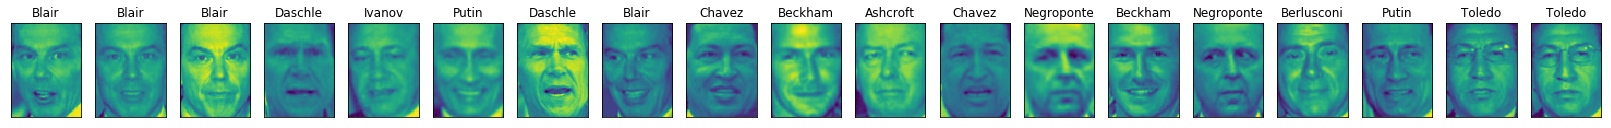

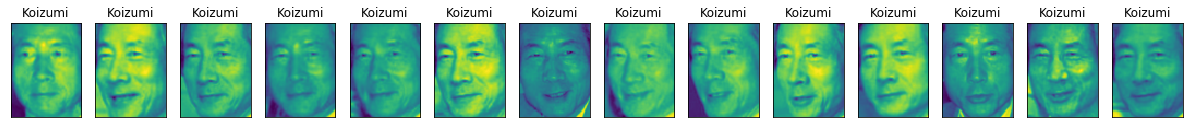

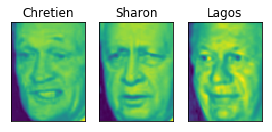

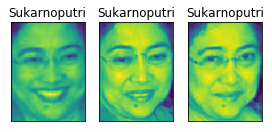

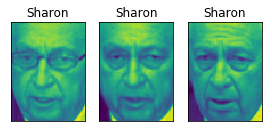

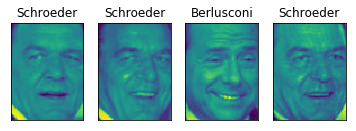

In [400]:
for cluster in range(max(np.unique(labels)+1)):
    mask=labels==cluster
    n_images= np.sum(mask)
    fig,axes=plt.subplots(1,n_images,figsize=(n_images*1.5,4),subplot_kw={'xticks':(),'yticks':()})
    for image,label,ax in zip(X_people[mask],y_people[mask],axes):
        ax.imshow(image.reshape(image_shape))
        ax.set_title(people.target_names[label].split()[1])
        
    

** <span style='color:red'>Note : - </span> **
- Some of the clusters have distinct faces such as __Sharon, koizumi, tayyip, shukranoputri__
- Within each cluster orietation of face , expression is fixed
- Some of the cluster has multiple people face but seem to have similar orientation
- Point is :: Clusters have got faces having some similarities of some of the characterstics  
** <span style='color:blue'> Apply K-Means and AGGLOMERATIVE Clustering technique</span> **
- Lets no of clusters as 10 and analyze each other

In [401]:
kmeans=KMeans(n_clusters=10,random_state=0)

In [402]:
labels_km=kmeans.fit_predict(X_pca)

In [403]:
print('Cluster size {}'.format(np.bincount(labels_km)))

Cluster size [191 243 130 218 298 114 296  85 147 254]


- Get center of each one of the cluster
- Transform the Center data point to the original space 
- Retrieve the image and analyze

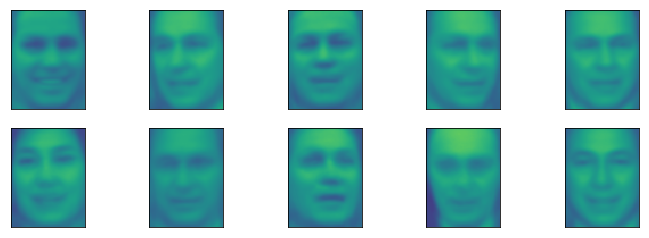

In [404]:
fig,axes= plt.subplots(2,5,subplot_kw={'xticks':(),'yticks':()},figsize=(12,4))
for image_center,ax in zip(kmeans.cluster_centers_,axes.ravel()):
    ax.imshow(pca.inverse_transform(image_center).reshape(image_shape),vmin=0,vmax=1)

** <span style='color:red'>Note:-</span> **
- We have transformed the CENTROID of each cluster to the original space to get the mean characterstics of each CLUSTER
- Its very smooth version of faces
- Clustering seems to have picked up faces on different orientation of the faces, different expression (1) 1st cluster shpws the smiling faces 
- Below picture shows the CENTER of Cluster and 5 Closest images to the CENTER and 5 the FURTHEST

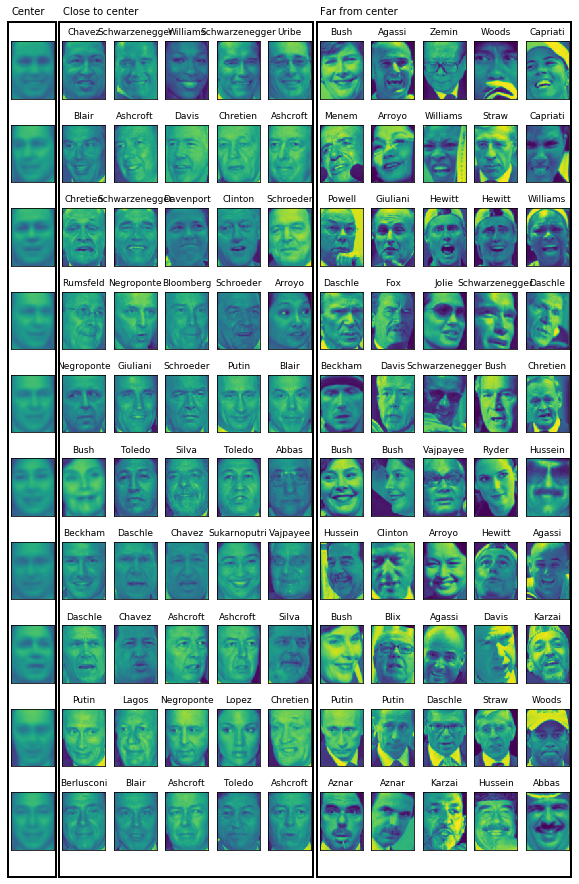

In [405]:
mglearn1.plots.plot_kmeans_faces(kmeans,pca,X_pca,X_people,y_people,people.target_names)

## <span style='color:red'>Analyzing the faces dataset with agglomerative clustering</span>

In [406]:
## Extract clusters with WARD agglomerative clustering
agglomerative=AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print('Size of clusters using Agglomerative Technique :{}'.format(np.bincount(labels_agg)))

Size of clusters using Agglomerative Technique :[ 99 493 345 140  25 154  58  35 601  26]


- <span style='color:blue'>These cluster sizes are more UNEVEN as compared to k-means but much more EVEN as compared to DBSCAN
- Calculate ARI between k-means and agglomerative
</scan>

In [407]:
print('ARI between k means and Agg {:.2f}'.format(adjusted_rand_score(labels_agg,labels_km)))

ARI between k means and Agg 0.13


** <scan style='color:red'> ARI value is low between the two clusters indicates data points have little in common </scan> **
- Plot DENDOGRAM while limiting the depth of the tree, else branching down to the individual data points will be quite dense

In [408]:
linkage_array=ward(X_pca)

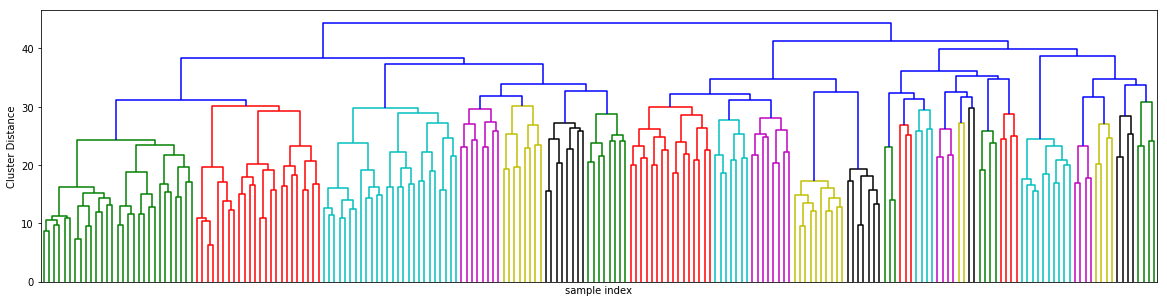

In [409]:
plt.figure(figsize=(20,5))
dendrogram(linkage_array,p=7,truncate_mode='level',no_labels=True)
plt.xlabel('sample index')
plt.ylabel('Cluster Distance')

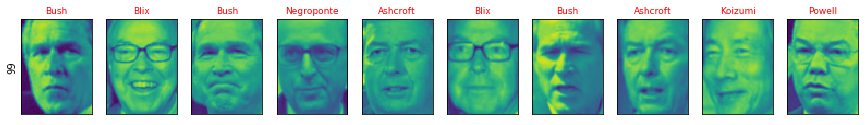

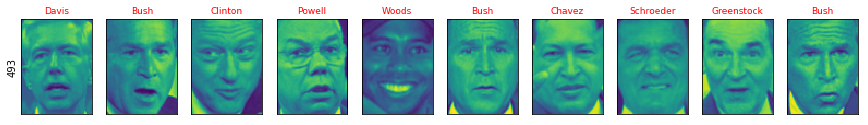

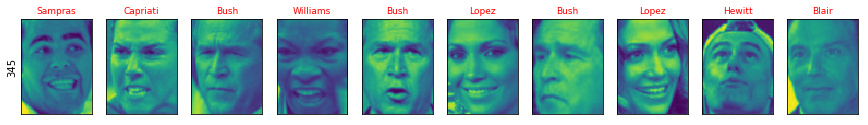

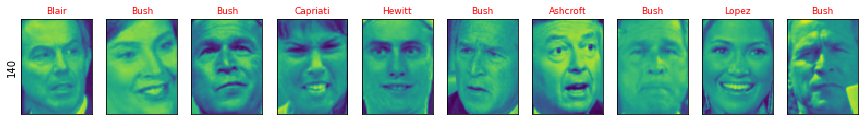

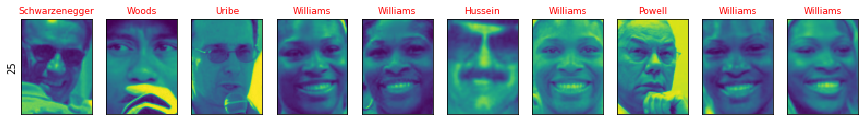

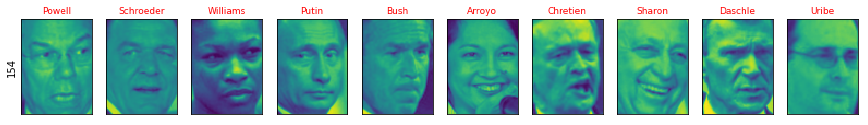

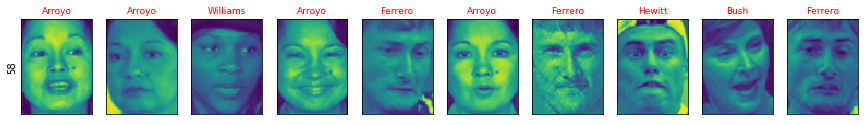

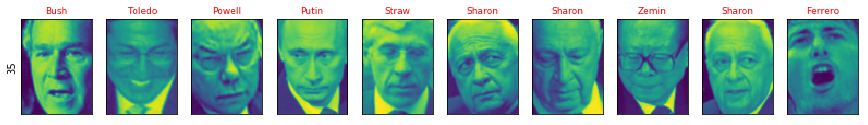

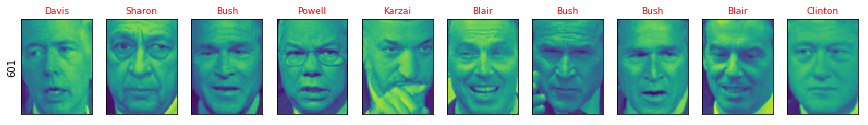

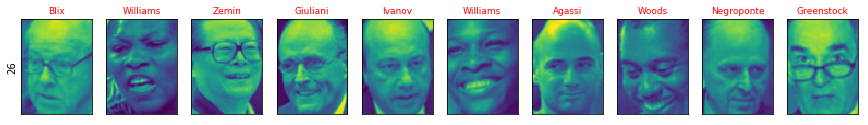

In [410]:
# We take 10 clusters using Agglomerative method
# plot 10 faces in each cluster and try to analyze the similarities
maxm=labels_agg.max()
for cluster in range(maxm+1):
    mask=labels_agg==cluster
    fig,axes = plt.subplots(1,10,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
    axes[0].set_ylabel(np.sum(mask))
    for image,label,ax in zip(X_people[mask],y_people[mask],axes):
        ax.imshow(image.reshape(image_shape),vmin=0,vmax=1)
        ax.set_title(people.target_names[label].split()[-1],fontdict={'fontsize':9,'color':'red'})

## <span style='color:red'>Analysis : </span>
- Some clusters seem to have Semantic theme but many of them are too large to be actually homogeneous
- last cluster seem to give baldness impression
- ** We can run the AGGLOMERATIVE algorith with high number of cluster in order to gain insight of some homogenity **

In [411]:
agglomerative= AgglomerativeClustering(n_clusters=40)

In [412]:
labels_agg = agglomerative.fit_predict(X_pca)

In [413]:
a=np.bincount(labels_agg)

In [414]:
a

array([ 44, 247,  26,  54, 175,  94, 128,  96,  42,  86,   5,  19,   8,
        61,  89,  15,  29,  66,  38,  26,  26,  17,  35,  94,  44,  22,
         9,  74,  36,  28,  25,  77,  12,  20,  23,   9,  14,   3,  50,  10], dtype=int64)

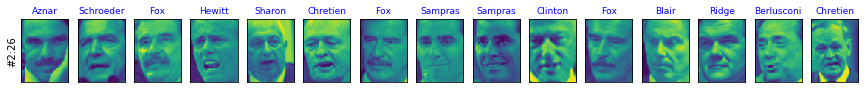

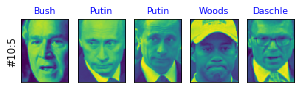

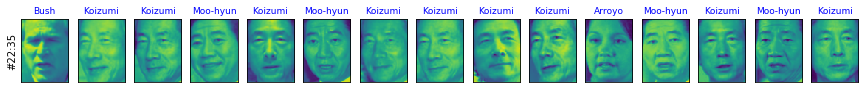

In [415]:
for cluster in[2,10,14,19,22,36]:
    mask=labels_agg==cluster
    fig,axes=plt.subplots(1,15,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
    axes[0].set_ylabel('#{}:{}'.format(cluster,np.sum(mask)))
    for image,label,ax in zip(X_people[mask],y_people[mask],axes):
        ax.imshow(image.reshape(image_shape),vmin=0,vmax=1)
        ax.set_title(people.target_names[label].split()[-1],fontdict={'fontsize':9,'color':'b'})
    for i in range(np.sum(mask),15):
        axes[i].set_visible(False)

# <span style='color:red'>Summary: -</span>
- Clustering is very helpful in EXPLORATIVE Data Analysis
- Three Clustering algorithms - K-Means, Agglomerative and DBSCAN
- k-means and agglomerative = controls clusters directly while DBSCAN asks for EPS and MIN_SAMPLE to control clusters number indirectly
- k-means ==> cluster is characterized using the CLUSTER MEAN, meaning each data point is represented by the cluster center
- DBSCAN allows the detection of noise points, allows for complex cluster shape